Overview:
In this project,i analyze data from bank customers who have taken out loans in order to assess the risk of loan defaults. The aim is to develop a predictive model that predicts whether a customer is a good or bad credit risk based on various customer attributes, such as age, gender, occupation, housing situation and others. By applying data science techniques and models,I want to improve the bank's lending procedures and optimize risk management.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/Users/caner/Desktop/Data Science/CreditRiskPrediction/data.csv'
data_df = pd.read_csv(data_path)

In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [3]:
data_df.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [4]:
data_df.tail(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
980,980,49,male,2,own,little,moderate,8386,30,furniture/equipment
981,981,33,male,3,rent,little,NaN,4844,48,business
982,982,28,female,3,own,moderate,rich,2923,21,car
983,983,26,male,2,own,little,little,8229,36,car
984,984,30,male,1,own,little,NaN,2028,24,furniture/equipment
985,985,25,female,2,rent,little,little,1433,15,furniture/equipment
986,986,33,male,2,own,little,rich,6289,42,business
987,987,64,female,2,own,moderate,NaN,1409,13,radio/TV
988,988,29,male,3,free,little,little,6579,24,car
989,989,48,male,1,own,little,moderate,1743,24,radio/TV


In [5]:
data_df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


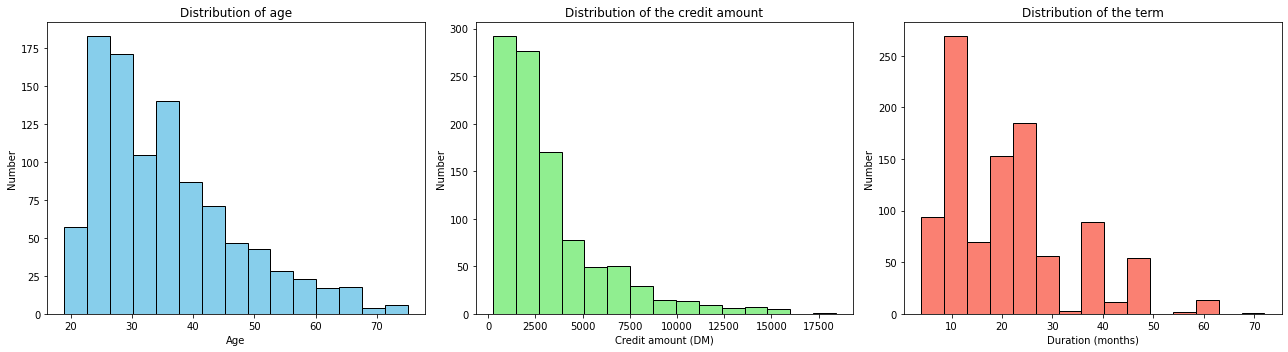

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(data_df['Age'], bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number')

axes[1].hist(data_df['Credit amount'], bins=15, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of the credit amount')
axes[1].set_xlabel('Credit amount (DM)')
axes[1].set_ylabel('Number')

axes[2].hist(data_df['Duration'], bins=15, color='salmon', edgecolor='black')
axes[2].set_title('Distribution of the term')
axes[2].set_xlabel('Duration (months)')
axes[2].set_ylabel('Number')

plt.tight_layout()
plt.show()


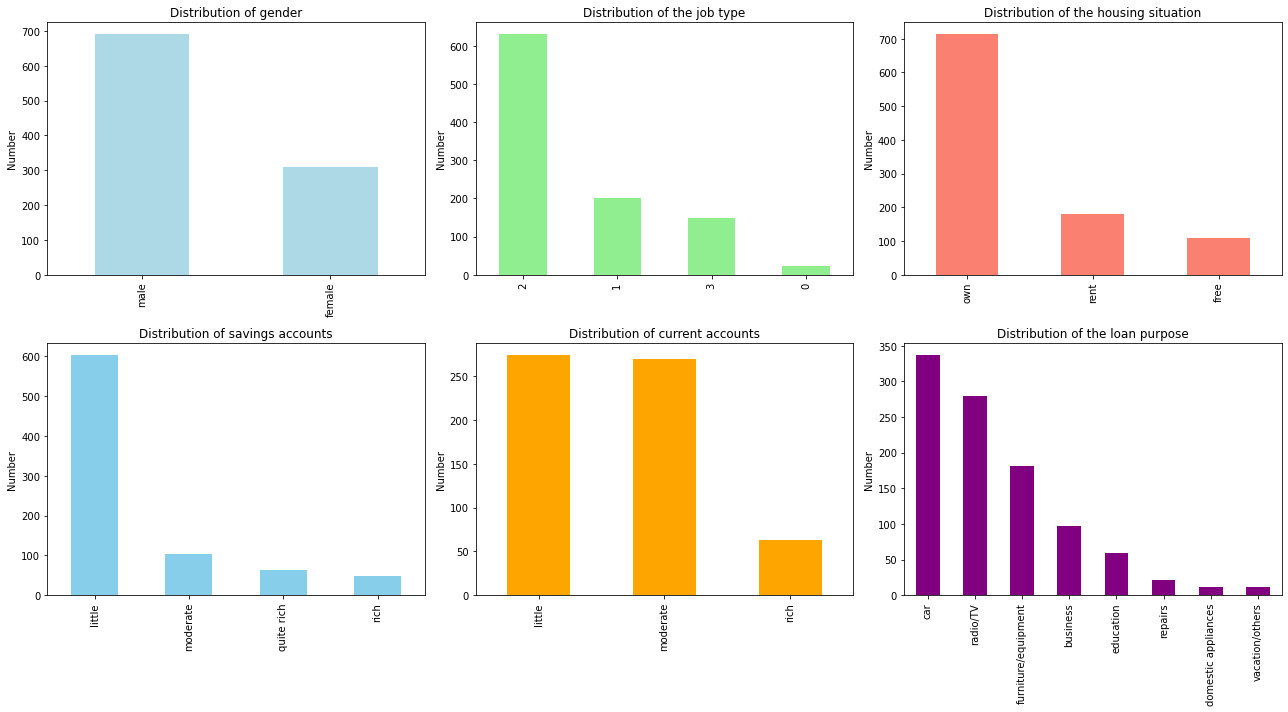

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 

data_df['Sex'].value_counts().plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Distribution of gender')
axes[0,0].set_ylabel('Number')

data_df['Job'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribution of the job type')
axes[0,1].set_ylabel('Number')

data_df['Housing'].value_counts().plot(kind='bar', ax=axes[0,2], color='salmon')
axes[0,2].set_title('Distribution of the housing situation')
axes[0,2].set_ylabel('Number')

data_df['Saving accounts'].value_counts().plot(kind='bar', ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Distribution of savings accounts')
axes[1,0].set_ylabel('Number')

data_df['Checking account'].value_counts().plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Distribution of current accounts')
axes[1,1].set_ylabel('Number')

data_df['Purpose'].value_counts().plot(kind='bar', ax=axes[1,2], color='purple')
axes[1,2].set_title('Distribution of the loan purpose')
axes[1,2].set_ylabel('Number')

plt.tight_layout()
plt.show()

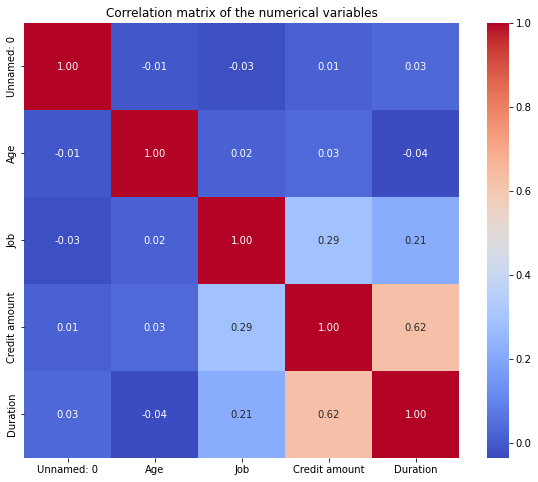

In [8]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation matrix of the numerical variables')
plt.show()

In [9]:
data_df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data_df.dropna(subset=['Saving accounts', 'Checking account'], inplace=True)

In [11]:
data_df.head(30)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car
10,25,female,2,rent,little,moderate,1295,12,car
11,24,female,2,rent,little,little,4308,48,business
12,22,female,2,own,little,moderate,1567,12,radio/TV
13,60,male,1,own,little,little,1199,24,car
14,28,female,2,rent,little,little,1403,15,car


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
dtypes: int64(4), object(5)
memory usage: 40.8+ KB
